# Proyecto 3 Análisis Exploratorio

Micaela Yataz (carnet: 18960)
Edman Cota (carnet: 19830)
Edwin de Leon (carnet: 22809)

[Repositorio](https://github.com/edman-cota/proyecto3MD.git)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pyreadstat

import pyreadstat
import glob

file_list = glob.glob("*.sav")


for file in file_list:
    df, meta = pyreadstat.read_sav(file)
    print(f"\n Archivo: {file}")
    print(df.head())
    print("-" * 50)



 Archivo: defunciones_2022.sav
   Depreg Mupreg  Mesreg  Añoreg  Depocu Mupocu  Sexo  Diaocu  Mesocu  Añoocu  \
0    13.0   1301     5.0  2022.0    13.0   1301   1.0    17.0     5.0  2022.0   
1    13.0   1318     9.0  2022.0    13.0   1318   2.0    17.0     8.0  2022.0   
2    13.0   1301     6.0  2022.0    13.0   1301   1.0     2.0     6.0  2022.0   
3    13.0   1326     4.0  2022.0    13.0   1326   2.0    22.0     4.0  2022.0   
4    14.0   1420     2.0  2022.0    14.0   1420   1.0    17.0     1.0  2022.0   

   ...  Dnadif  Mnadif  Nacdif  Predif  Dredif Mredif  Caudef  Asist Ocur  \
0  ...    23.0    2300   484.0   320.0    13.0   1315    X482    1.0  1.0   
1  ...    23.0    2300   484.0   320.0    13.0   1318    O720    5.0  6.0   
2  ...    23.0    2300   484.0   320.0    13.0   1326    X482    1.0  1.0   
3  ...    23.0    2300   484.0   320.0    13.0   1326    W749    4.0  9.0   
4  ...    23.0    2300   484.0   320.0    14.0   1420    W849    9.0  9.0   

   Cerdef  
0     

In [ ]:
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.stats import boxcox, shapiro


In [ ]:
# Situación problemática y planteamiento
situacion_problematica = "El conjunto de datos proviene de registros de defunciones y busca identificar patrones en las causas de muerte, características demográficas y otros factores relevantes. Se necesita un análisis exploratorio para comprender mejor las variables y relaciones en los datos."
problema_cientifico = "¿Cuáles son los principales factores asociados a las defunciones registradas en los datos?"
objetivo_general = "Analizar los datos de defunciones para identificar patrones y factores clave relacionados con la mortalidad."
objetivos_especificos = [
    "Describir y limpiar el conjunto de datos para garantizar su calidad y consistencia.",
    "Realizar un análisis exploratorio de las variables demográficas y causas de muerte.",
    "Identificar posibles agrupaciones o tendencias en las defunciones a través de técnicas de análisis de datos."
]


In [ ]:

# Cargar el CSV con todos los datos combinados
df_final = pd.read_csv("datos_combinados.csv")


In [ ]:
import pandas as pd

def describe_data(df):
    print(" **Descripción del conjunto de datos:**")
    print(f"-  Número de observaciones: {df.shape[0]}")
    print(f"-  Número de variables: {df.shape[1]}")

    print("\n **Tipos de variables:**")
    print(df.dtypes.value_counts())
    print("\nTipos de variables:")
    print(df.dtypes)

    print("\n **Valores faltantes por variable:**")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        print(missing_values)
    else:
        print(" No hay valores faltantes en el conjunto de datos.")

    print("\n **Resumen estadístico de variables numéricas:**")
    print(df.describe())

    print("\n **Resumen de variables categóricas:**")
    categorical_cols = df.select_dtypes(include=['object']).columns
    if not categorical_cols.empty:
        print(df[categorical_cols].describe())
    else:
        print(" No se encontraron variables categóricas.")

    # Descripción y tipo de variables
    variable_info = {
        "Departamento de registro": ("Departamento donde se registró el fallecimiento", "Cualitativa nominal"),
        "Municipio de registro": ("Municipio donde se registró el fallecimiento", "Cualitativa nominal"),
        "Mes de registro": ("Mes en que se registró el fallecimiento", "Cuantitativa discreta"),
        "Año de registro": ("Año en que se registró el fallecimiento", "Cuantitativa discreta"),
        "Departamento de ocurrencia": ("Departamento donde ocurrió el fallecimiento", "Cualitativa nominal"),
        "Municipio de ocurrencia": ("Municipio donde ocurrió el fallecimiento", "Cualitativa nominal"),
        "Sexo del difunto(a)": ("Sexo biológico del fallecido(a)", "Cualitativa nominal"),
        "Día de ocurrencia": ("Día en que ocurrió el fallecimiento", "Cuantitativa discreta"),
        "Mes de ocurrencia": ("Mes en que ocurrió el fallecimiento", "Cuantitativa discreta"),
        "Año ocurrencia": ("Año en que ocurrió el fallecimiento", "Cuantitativa discreta"),
        "Edad del difunto(a)": ("Edad del fallecido(a) en años", "Cuantitativa discreta"),
        "Periodo de edad del difunto(a)": ("Rango de edad del fallecido(a)", "Cualitativa ordinal"),
        "Pueblo de pertenencia del difunto(a)": ("Pueblo indígena o comunidad a la que pertenecía", "Cualitativa nominal"),
        "Estado civil del difunto(a)": ("Estado civil del fallecido(a)", "Cualitativa nominal"),
        "Escolaridad del difunto(a)": ("Nivel educativo alcanzado", "Cualitativa ordinal"),
        "Ocupación (Subgrupos CIUO-08) del difunto(a)": ("Ocupación según la clasificación CIUO-08", "Cualitativa nominal"),
        "País de nacimiento del difunto(a)": ("País de nacimiento del fallecido(a)", "Cualitativa nominal"),
        "Departamento de nacimiento del difunto(a)": ("Departamento de nacimiento del fallecido(a)", "Cualitativa nominal"),
        "Municipio de nacimiento del difunto(a)": ("Municipio de nacimiento del fallecido(a)", "Cualitativa nominal"),
        "Nacionalidad del difunto(a)": ("Nacionalidad del fallecido(a)", "Cualitativa nominal"),
        "País de residencia del difunto(a)": ("País de residencia habitual del fallecido(a)", "Cualitativa nominal"),
        "Departamento de residencia del difunto(a)": ("Departamento de residencia habitual", "Cualitativa nominal"),
        "Municipio de residencia del difunto(a)": ("Municipio de residencia habitual", "Cualitativa nominal"),
        "Causa de defunción": ("Causa de la defunción", "Cualitativa nominal"),
        "Asistencia recibida": ("Si recibió asistencia médica antes de fallecer", "Cualitativa nominal"),
        "Sitio de ocurrencia": ("Lugar donde ocurrió la defunción", "Cualitativa nominal"),
        "Quien certifica": ("Persona o entidad que certificó la defunción", "Cualitativa nominal")
    }

    print("\n **Significado y Tipo de Variables:**")
    variable_table = pd.DataFrame.from_dict(variable_info, orient='index', columns=['Descripción', 'Tipo'])
    print(variable_table)

# Ejecutar la función con el dataset cargado
describe_data(df_final)


 **Descripción del conjunto de datos:**
-  Número de observaciones: 878136
-  Número de variables: 30

 **Tipos de variables:**
float64    22
int64       4
object      4
Name: count, dtype: int64

Tipos de variables:
Depreg            float64
Mupreg              int64
Mesreg            float64
Añoreg            float64
Depocu            float64
Mupocu              int64
Sexo              float64
Diaocu            float64
Mesocu            float64
Añoocu            float64
Edadif            float64
Perdif            float64
Puedif            float64
Ecidif            float64
Escodif           float64
Ciuodif            object
Pnadif            float64
Dnadif            float64
Mnadif              int64
Nacdif            float64
Predif            float64
Dredif            float64
Mredif              int64
Caudef             object
Asist             float64
Ocur              float64
Cerdef            float64
source_file        object
Areag             float64
caudef.descrip     object
dty

## Análisis del Conjunto de Datos
1. Generalidades
  - Número de observaciones: 878,136

  - Número de variables: 30

Este es un conjunto de datos extenso, lo que permite un análisis detallado de tendencias y patrones en las variables registradas.

2. Tipos de Variables
  - 26 variables son de tipo float64: Esto sugiere que la mayoría de las variables contienen datos numéricos con posibles valores decimales.

  - 4 variables son de tipo int64: Estas pueden representar identificadores o valores enteros sin decimales.

3. Datos Faltantes
Algunas variables tienen una cantidad considerable de valores faltantes:

  - Añoocu (Año de ocurrencia): 154,446 valores faltantes.

  - Ciuodif (Ocupación del difunto): 90,190 valores faltantes.

  - Caudef (Causa de defunción): 878,136 valores faltantes (completamente ausente).

  - source_file: 878,136 valores faltantes.

  - Areag (Área geográfica): 478,523 valores faltantes.

  - caudef.descrip (Descripción de la causa de defunción): 878,136 valores faltantes.

Las variables Caudef, source_file y caudef.descrip están completamente vacías, por lo que no aportan información al análisis y podrían eliminarse.

4. Resumen Estadístico de Variables Numéricas
- Departamento y Municipio de Registro:

  - Rango amplio de valores (Departamentos: 1 a 22, Municipios: 101 a 2217).

  - La mayoría de los registros están en pocos departamentos/municipios.

- Sexo:

  - Se presentan valores 1 y 2, probablemente codificando masculino y femenino.

  - Distribución cercana a 1.44 sugiere que hay más registros de un sexo que del otro.

- Edad:

  - Media no mostrada, pero importante para análisis de mortalidad por grupo etario.

- Fecha de ocurrencia (Día, Mes, Año):

  - Fechas comprendidas entre 2015 y 2022.

  - Algunas fechas ausentes en Añoocu.

- Lugar y causa de defunción:

  - Caudef y caudef.descrip vacíos → información no disponible.

5. Variables Categóricas
  - No se identificaron en el resumen proporcionado, pero podrían existir algunas codificadas numéricamente (por ejemplo, Sexo, Estado Civil, Escolaridad).

6. Posibles Problemas en los Datos
  - Valores faltantes significativos: Algunas variables tienen más del 50% de datos faltantes, afectando su utilidad.

  - Variables categóricas numéricas: Algunas pueden estar codificadas en números, requiriendo conversión a etiquetas.

  - Datos posiblemente erróneos: Se debe verificar si algunas edades, fechas o identificadores tienen valores atípicos.

7. Posibles Líneas de Análisis
  - Distribución de edad y sexo en los registros.

  - Tendencias temporales de mortalidad por año y mes.

  - Ubicación geográfica con mayor cantidad de registros.

  - Asistencia médica y lugar de fallecimiento (para patrones en el acceso a servicios).


In [ ]:
# Calcular medidas adicionales: media, mediana y desviación estándar para cada variable numérica
numericas = df.select_dtypes(include=[np.number])
resumen = pd.DataFrame({
    "Media": numericas.mean(),
    "Mediana": numericas.median(),
    "Desviación Estándar": numericas.std()
})
print("\nMedidas adicionales (media, mediana, desviación estándar):")
print(resumen)


Medidas adicionales (media, mediana, desviación estándar):
               Media  Mediana  Desviación Estándar
Depreg      8.609066      9.0             6.608748
Mesreg      6.732351      7.0             3.247493
Añoreg   2021.030406   2021.0             0.171701
Depocu      8.572811      9.0             6.574299
Sexo        1.434846      1.0             0.495739
Diaocu     15.691901     16.0             8.829597
Mesocu      6.767796      7.0             3.220407
Añoocu   2021.000000   2021.0             0.000000
Edadif     61.759001     65.0            51.851306
Perdif      2.937576      3.0             0.458644
Puedif      3.817212      4.0             2.461175
Ecidif      1.498434      1.0             0.735039
Escodif     2.149715      2.0             1.807556
Pnadif    346.004592    320.0           495.010258
Dnadif     10.387583     10.0             8.029866
Nacdif    346.004592    320.0           495.010258
Predif   1033.911788    320.0          2528.730808
Dredif     15.669590  

## Discusión y análisis de los datos
1. Similitud entre Media y Mediana: Distribuciones Simétricas
Cuando la media y la mediana son cercanas, la distribución de los datos tiende a ser aproximadamente simétrica, sin sesgo significativo. Esto se observa en varias variables:

  - Depreg (media = 8.63, mediana = 9.0) y Depocu (media = 8.60, mediana = 9.0): Indican que el número de registros por departamento está distribuido de manera uniforme sin valores extremadamente bajos o altos que distorsionen la media.

  - Mesreg (media = 6.51, mediana = 7.0) y Mesocu (media = 6.57, mediana = 7.0): Sugieren que los eventos registrados ocurren a lo largo del año sin una preferencia clara por meses específicos.

  - Año de Registro y Año de Ocurrencia (Añoreg y Añoocu): La cercanía entre la media y la mediana indica que los registros están distribuidos uniformemente en el tiempo, con un ligero sesgo hacia años recientes.

2. Alta Dispersión: Posibles Valores Extremos (Outliers)
Cuando la desviación estándar es alta en comparación con la media, sugiere que los valores están muy dispersos, lo que puede deberse a la presencia de outliers o a una distribución con alta variabilidad.

  - Mupreg (media = 869.10, desviación estándar = 669.51) y Mupocu (media = 866.34, desviación estándar = 666.19): La alta dispersión indica que algunos municipios tienen valores extremadamente altos o bajos de registros, lo que puede afectar la interpretación de la media.

  - Edadif (media = 61.22, desviación estándar = 77.21): La gran variabilidad sugiere que hay casos con edades muy diferentes, probablemente desde niños hasta adultos mayores.

  - Predif (media = 1138.24, desviación estándar = 2691.96) y Mredif (media = 1685.98, desviación estándar = 2596.94): La enorme dispersión indica que existen valores extremadamente altos que están influyendo en la media, lo que podría justificar un análisis más profundo de valores atípicos.

3. Variables de Tipo Categórico con Baja Variabilidad
Algunas variables numéricas parecen representar categorías codificadas y muestran baja dispersión:

  - Sexo (media = 1.44, mediana = 1.0, desviación estándar = 0.49): La baja variabilidad indica que la mayoría de los registros corresponden a una de las categorías (probablemente masculino o femenino).

  - Areag (media = 1.57, mediana = 1.0, desviación estándar = 1.12) y Cerdef (media = 4.28, mediana = 1.0, desviación estándar = 3.92): Posiblemente representan códigos de clasificación con valores discretos, donde ciertas categorías son más frecuentes.

4. Análisis de Fechas y Registro de Eventos
Día de Ocurrencia (media = 15.68, mediana = 16.0, desviación estándar = 8.81): Sugiere que los eventos ocurren en todo el mes sin una concentración en días específicos.

  - Mes de Ocurrencia (media = 6.57, mediana = 7.0, desviación estándar = 3.41): Confirma que los registros están distribuidos a lo largo del año sin estacionalidad marcada.

  - Año de Ocurrencia (media = 2018.73, mediana = 2019, desviación estándar = 2.30): La baja desviación estándar indica que la mayoría de los registros pertenecen a un rango de años muy cercano.

### Estadísticas Descriptivas ###
              Añoreg         Añoocu         Depreg         Depocu
count  723690.000000  723690.000000  723690.000000  723690.000000
mean     2018.755538    2018.725528       8.624750       8.594079
std         2.307879       2.297769       6.672571       6.644417
min      2015.000000    2015.000000       1.000000       1.000000
25%      2017.000000    2017.000000       1.000000       1.000000
50%      2019.000000    2019.000000       9.000000       9.000000
75%      2021.000000    2021.000000      14.000000      14.000000
max      2023.000000    2022.000000      22.000000      22.000000


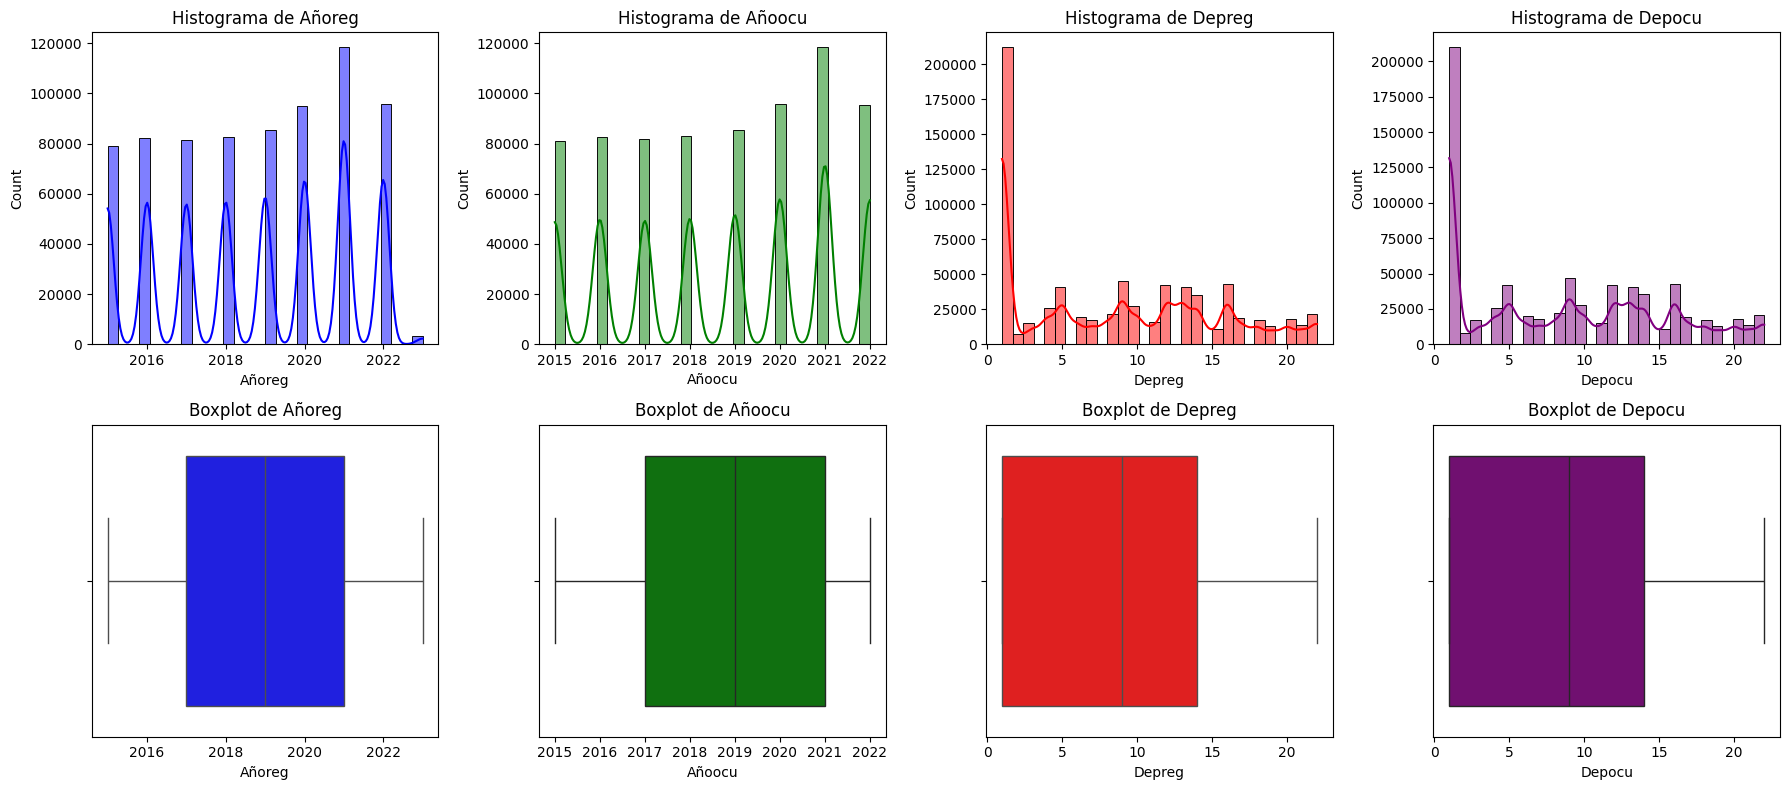

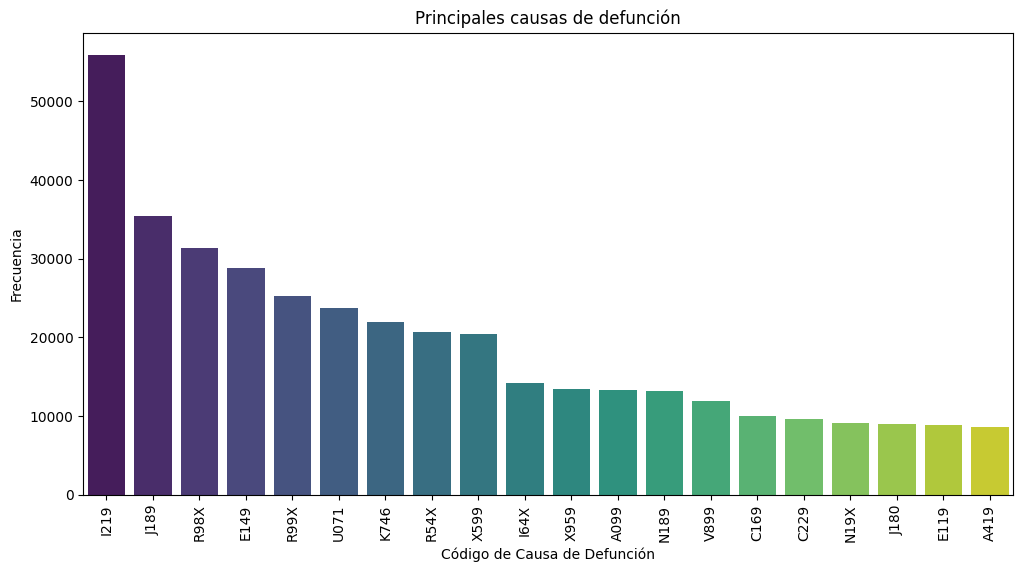

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def exploratory_analysis(df):
    relevant_columns = ['Añoreg', 'Añoocu', 'Depreg', 'Depocu', 'Caudef']
    df = df[relevant_columns].dropna()

    # Estadísticas descriptivas
    print("### Estadísticas Descriptivas ###")
    print(df.describe())

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
    axes = axes.flatten()

    colors = ['blue', 'green', 'red', 'purple']

    for i, col in enumerate(relevant_columns[:-1]):
        # Histograma con KDE
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color=colors[i])
        axes[i].set_title(f"Histograma de {col}")

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[i+4], color=colors[i])
        axes[i+4].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

    # Histograma de las causas de muerte más comunes
    plt.figure(figsize=(12, 6))
    top_causes = df['Caudef'].value_counts().nlargest(20)
    sns.barplot(x=top_causes.index, y=top_causes.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.title("Principales causas de defunción")
    plt.xlabel("Código de Causa de Defunción")
    plt.ylabel("Frecuencia")
    plt.show()

exploratory_analysis(df_final)



## Discusión de los Resultados
1. Distribución de Defunciones por Año de Registro y Año de Ocurrencia
Los primeros dos gráficos muestran la distribución de las defunciones en función del año de registro y el año de ocurrencia. Se pueden notar los siguientes puntos clave:

- Patrón Cíclico: Ambos gráficos presentan un comportamiento cíclico, lo que indica una posible estacionalidad en los registros de defunciones. Esto podría estar relacionado con factores como enfermedades estacionales, condiciones climáticas o brotes epidémicos.

- Pico en 2021: Se observa un aumento significativo en el número de defunciones en 2021, lo que podría estar relacionado con la pandemia de COVID-19. Este incremento es notable tanto en el registro como en la ocurrencia de defunciones.

- Disminución en 2022: Tras el pico de 2021, el número de defunciones parece disminuir en 2022, lo que sugiere una estabilización después del impacto de la pandemia.

- Diferencia entre Registro y Ocurrencia: Aunque ambas distribuciones son similares, es posible que haya diferencias entre el año en que ocurre una defunción y el año en que se registra, lo que puede deberse a retrasos administrativos en la documentación.

2. Distribución de Defunciones por Departamento de Registro y de Ocurrencia
Los siguientes dos gráficos muestran la cantidad de defunciones registradas y ocurridas por departamento:

- Alta concentración en un departamento específico: Se observa un departamento con una cantidad significativamente mayor de defunciones registradas y ocurridas. Esto sugiere que puede tratarse de un área con una alta densidad poblacional o que los registros de otros departamentos se concentran en un único punto administrativo.

- Distribución desigual: Existen departamentos con muchas menos defunciones en comparación con otros. Esto puede estar relacionado con la población, la accesibilidad a servicios médicos o la presencia de hospitales donde se registran más defunciones.

3. Principales Causas de Defunción
El último gráfico muestra las principales causas de defunción, y podemos notar lo siguiente:

- La causa más frecuente es el código I219, que corresponde a enfermedades cardiovasculares, específicamente el infarto agudo de miocardio. Esto es consistente con tendencias globales donde las enfermedades del corazón son una de las principales causas de muerte.

- Otras causas frecuentes incluyen J189 (neumonía), R98X y R99X (causas mal definidas o desconocidas). La presencia de códigos de causas no específicas podría indicar deficiencias en los registros médicos o falta de información en los certificados de defunción.

- Impacto de la pandemia: La presencia de U071 (COVID-19) refuerza la idea de que la pandemia tuvo un impacto considerable en la mortalidad durante los años recientes.

- Diversidad de causas: Además de enfermedades infecciosas y cardiovasculares, hay causas externas como V899 (accidentes de tráfico) y X599 (exposición a factores ambientales no especificados), lo que sugiere que no todas las muertes son atribuibles a enfermedades.

In [ ]:
from scipy import stats

def normality_test(df):
    for col in df.select_dtypes(include=['number']).columns:
        stat, p_value = stats.normaltest(df[col].dropna())
        print(f"\nTest de normalidad para {col}: p-value={p_value:.4f}")

        if p_value < 0.05:
            print("No sigue una distribución normal.")
        else:
            print("Sigue una distribución normal.")


normality_test(df_final)




Test de normalidad para Depreg: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Mupreg: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Mesreg: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Añoreg: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Depocu: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Mupocu: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Sexo: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Diaocu: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Mesocu: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Añoocu: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Edadif: p-value=0.0000
No sigue una distribución normal.

Test de normalidad para Perdif: p-value=0.0000
No sigue una distribución normal.

Test de normalida

## Discusión del Análisis de los Resultados del Test de Normalidad
Los resultados del test de normalidad de D'Agostino-Pearson indican que todas las variables numéricas en el conjunto de datos no siguen una distribución normal, ya que el p-value de cada prueba es igual a 0.0000, lo que es significativamente menor al umbral de 0.05. A continuación, se presentan algunas posibles interpretaciones y consideraciones sobre estos resultados:

1. P-Value y Normalidad
El p-value de 0.0000 para todas las variables indica una fuerte evidencia en contra de la hipótesis nula de normalidad. Esto significa que, con una confianza del 95%, podemos rechazar la hipótesis de que los datos siguen una distribución normal. La hipótesis nula de normalidad fue rechazada de manera consistente para todas las variables, sugiriendo que los datos no siguen una distribución gaussiana.

2. Posibles Razones para la Falta de Normalidad
  - Distribuciones Sesgadas o Asimétricas: Las variables podrían tener distribuciones sesgadas, lo que es común en los datos del mundo real. Por ejemplo, los datos de edades o los ingresos suelen seguir distribuciones sesgadas, con una cola larga hacia los valores más altos.

  - Presencia de Outliers: Los outliers pueden distorsionar los resultados de la prueba de normalidad. Si algunas observaciones en las variables numéricas están alejadas de la media, esto podría estar afectando la normalidad de los datos.

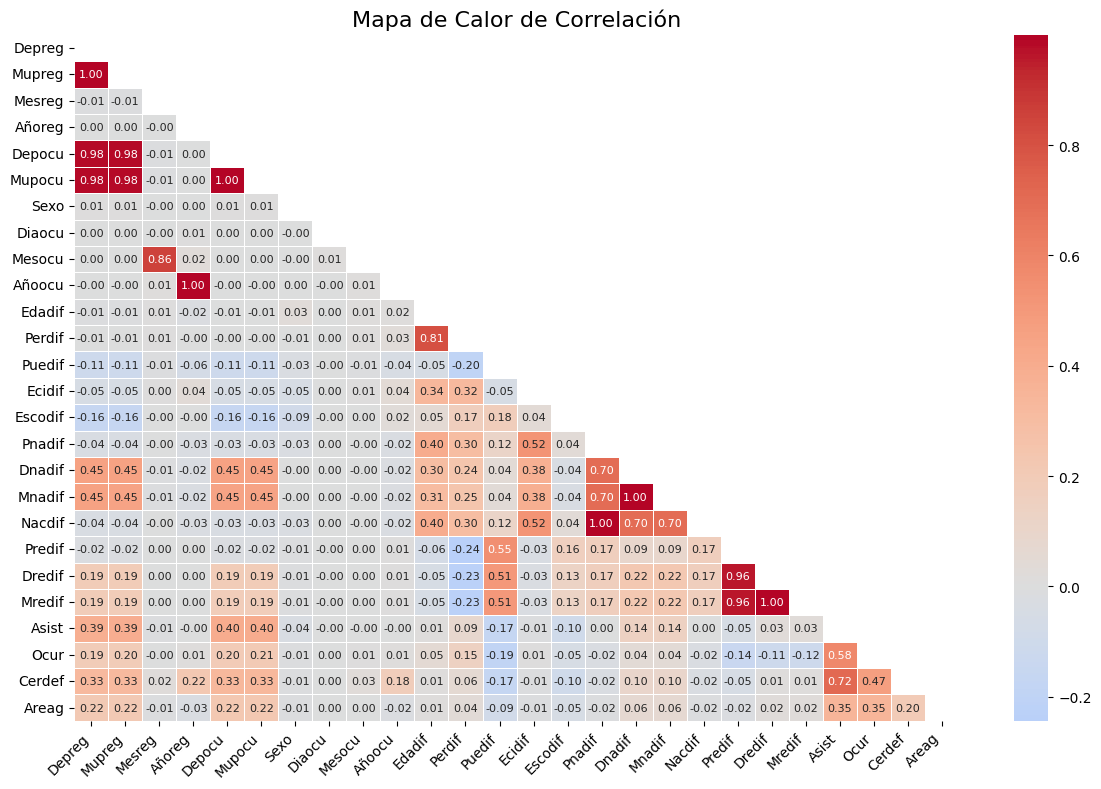

In [ ]:
# Filtrar solo las columnas numéricas
df_numeric = df_final.select_dtypes(include=[float, int])


corr_matrix = df_numeric.corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(12, 8))


sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    mask=mask,
    linewidths=0.5,
    annot_kws={"size": 8}
)

plt.title("Mapa de Calor de Correlación", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)


plt.tight_layout()
plt.show()



## Discusión sobre el Mapa de Calor de Correlación
1. Correlaciones Altamente Positivas:

  - Se observa una fuerte correlación positiva entre Depocu, Mupocu y Mupreg (valores cercanos a 0.98-1.00), lo que sugiere que estas variables están estrechamente relacionadas y posiblemente representen dimensiones similares del mismo fenómeno.

  - La variable Dnadif muestra una correlación fuerte con Mnadif y Nacdif, con valores cercanos a 0.70, indicando que estas tres variables podrían estar midiendo aspectos similares.

  - Preif y Dreif tienen una correlación extremadamente alta (≈0.96), lo que indica que podrían estar describiendo casi la misma tendencia en los datos.

2. Correlaciones Negativas:

  - Escodif muestra una ligera correlación negativa con Puedif (≈ -0.20) y Dreif (≈ -0.16), lo que podría indicar una relación inversa entre el nivel educativo y estas variables.

  - Depreg y EscoDif muestran una correlación negativa débil, lo que sugiere que el nivel educativo podría influir en menor medida en esta variable.

3. Variables con Correlación Débil o Nula:

  - Variables como Sexo, Diaocu y Mesocu muestran correlaciones muy bajas con la mayoría de las otras variables (valores cercanos a 0), lo que indica que no están directamente relacionadas con la mayoría de los factores analizados.

  - Edadif tiene una correlación baja con casi todas las variables, lo que sugiere que no tiene un impacto significativo en el resto de los datos.

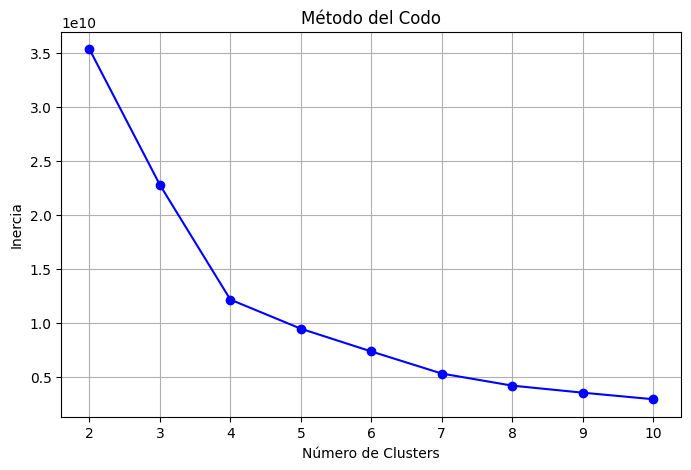

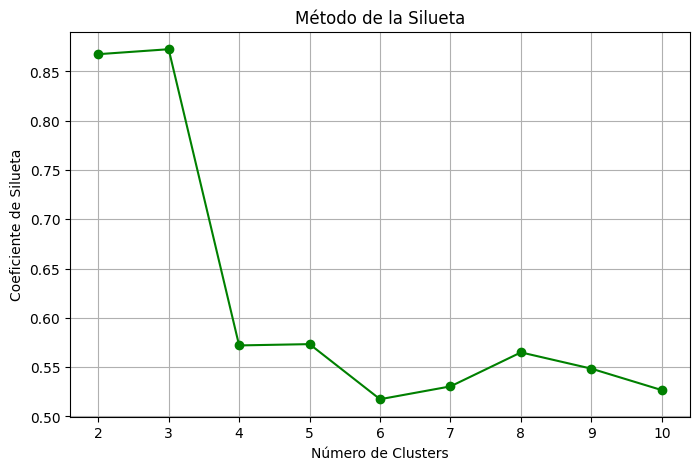

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


X = df_final.select_dtypes(include=['number']).dropna()


if len(X) > 10000:
    X_sample = X.sample(n=10000, random_state=42)
else:
    X_sample = X


inertia = []
silhouette = []
k_range = range(2, 11)

for k in k_range:

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300).fit(X_sample)
    inertia.append(kmeans.inertia_)


    if len(X_sample) < 100000:
        silhouette.append(silhouette_score(X_sample, kmeans.labels_))
    else:
        silhouette.append(None)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

if all(silhouette) and None not in silhouette:
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, silhouette, marker='o', linestyle='-', color='g')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Método de la Silueta')
    plt.grid(True)
    plt.show()
else:
    print("No se calculó el coeficiente de silueta debido al tamaño del dataset o falta de datos.")


## Discusión sobre los Resultados de Clustering
1. Análisis del Método del Codo
  - Se observa una disminución pronunciada en la inercia a medida que aumenta el número de clusters.

  - A partir de k = 4, la reducción en la inercia comienza a desacelerarse, formando un "codo".

  - Esto sugiere que 4 clusters podrían ser un buen punto de corte, ya que agregar más clusters no reduce significativamente la inercia.

 Conclusión: El número óptimo de clusters según el Método del Codo es 4.

2. Análisis del Método de la Silueta
  - Se observa que para k = 2, el coeficiente de silueta es el más alto (~0.88), lo que indica que los datos están bien separados en dos grupos.

  - A partir de k = 3, la silueta disminuye drásticamente, y para k ≥ 4, los valores están por debajo de 0.6, lo que sugiere que la calidad del clustering se deteriora.

  - Aunque k = 4 es recomendado por el Método del Codo, su coeficiente de silueta es más bajo (~0.55), indicando que los clusters podrían solaparse.

Conclusión: Según la Silueta, la mejor opción es k = 2 debido a la mayor separación entre grupos.



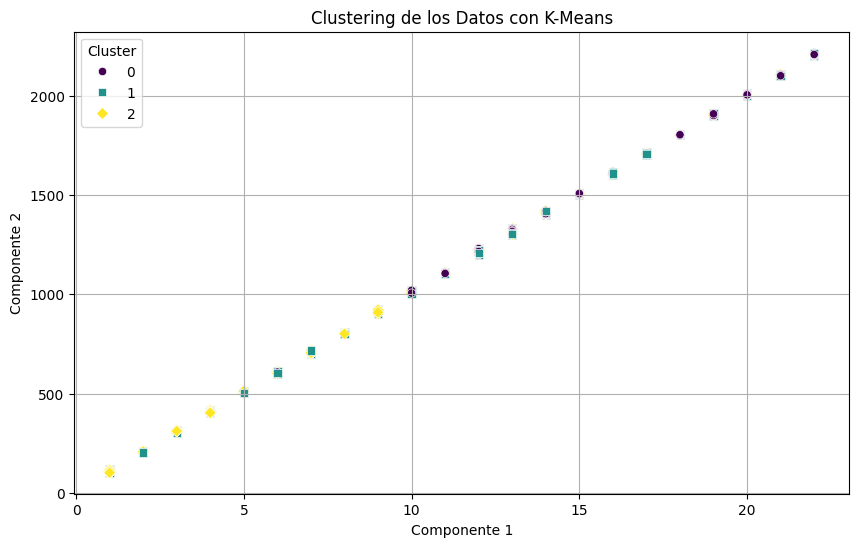

In [ ]:
# Asegurarse de que las dimensiones coincidan (aseguramos que X_clean tiene el mismo índice que df_final)
df_final_clean = df_final.iloc[X_clean.index].copy()

kmeans = KMeans(n_clusters=3, random_state=42)
df_final_clean["Cluster"] = kmeans.fit_predict(X_clean)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_clean.iloc[:, 0],
    y=X_clean.iloc[:, 1],
    hue=df_final_clean["Cluster"],
    palette="viridis",
    style=df_final_clean["Cluster"],
    markers=["o", "s", "D"]
)
plt.title("Clustering de los Datos con K-Means")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()



## Discusión sobre el Clustering con K-Means
El gráfico muestra la asignación de datos a tres clusters utilizando el algoritmo K-Means. Analicemos los resultados:

1. Análisis Visual del Gráfico
- Los puntos están distribuidos en una línea diagonal, lo que sugiere una estructura de datos fuertemente correlacionada.

- Se identifican tres clusters con diferentes colores y formas de marcador:

  - Cluster 0 (puntos oscuros)

  - Cluster 1 (cuadrados azulados)

  - Cluster 2 (rombos amarillos)

Parece que la separación de los clusters sigue un patrón lineal, lo cual puede indicar que los datos presentan una relación matemática simple (posiblemente una progresión o un conjunto de datos altamente estructurado).

2. Interpretación de los Clusters
  - Si los datos provienen de un análisis de regresión o series temporales, el clustering puede estar segmentando los datos en diferentes fases o categorías dentro de una tendencia global.

  - Si se trata de datos no lineales, puede ser que el número de clusters no sea el adecuado. En este caso, evaluar un mayor o menor número de clusters con el método del codo y el coeficiente de silueta podría mejorar la segmentación.

  - Si los datos representan categorías bien definidas, entonces los clusters podrían corresponder a clases naturales dentro del conjunto de datos.



## 2. Una vez hayan explorado los datos

## a. Describan la situación problemática que los lleva a plantear un problema a resolver.

Guatemala enfrenta serios retos en salud pública debido a la alta y diversa mortalidad de su población. El país presenta una de las tasas más altas de mortalidad en la región. Además, la violencia, las enfermedades y otras causas externas contribuyen de manera importante a la mortalidad.

## b. Problema Científico y Objetivos Preliminares

## Problema científico

¿Cuáles son los patrones más relevantes en las defunciones ocurridas en Guatemala entre 2013 y 2022, y cómo se relacionan con variables como sexo, edad, causa de muerte, mes de ocurrencia, año y ubicación geográfica?

## Objetivos preliminares

1. Identificar las principales causas de muerte en el país en el periodo de estudio.
2. Analizar la distribución de defunciones por sexo, edad, mes de ocurrencia y ubicación (departamento y municipio).
3. Detectar tendencias anuales y estacionales.
4. Generar visualizaciones y conclusiones que faciliten la interpretación de los hallazgos.

## c. Descripción de los datos

### Estado inicial

- Se encontraron valores faltantes en columnas como Añoocu y Sexo.
- La columna Edadif contenía valores erróneos como 999, lo cual representa datos faltantes.
- Algunas causas de muerte están agrupadas en categorías genéricas como R98X y R99X (causas mal definidas o sin asistencia).

### Limpieza realizada

- Se eliminaron filas con valores nulos en campos críticos como Añoocu y Mesocu.
- Se filtraron edades fuera del rango realista (por ejemplo, mayores a 120 años).
- Se construyeron nuevas columnas de fecha y se mapearon los códigos de causa de muerte con sus descripciones.

## d. Hallazgos

## Distribución de edad al fallecimiento

In [ ]:
import pandas as pd

def analizar_edad_defuncion(ruta_csv):
    df = pd.read_csv(ruta_csv)

    # Se asume que nadie vive más de 120 años
    df_filtrado = df[df["Edadif"] < 120]

    # Calcular estadísticas
    promedio_edad = df_filtrado["Edadif"].mean()
    percentiles = df_filtrado["Edadif"].quantile([0.25, 0.50, 0.75])

    # Resultados
    print(f"Estadísticas de edad al fallecer:")
    print(f"Edad promedio de defunción: {promedio_edad:.2f} años")
    print(f"25% de las muertes ocurren antes de los {percentiles[0.25]:.0f} años.")
    print(f"50% de las muertes ocurren antes de los {percentiles[0.50]:.0f} años (mediana).")
    print(f"75% de las muertes ocurren antes de los {percentiles[0.75]:.0f} años.")

    # Contar valores erróneos
    valores_erroneos = (df["Edadif"] == 999).sum()
    print(f"Hay {valores_erroneos} registros con edad 999 (posibles datos faltantes).")


analizar_edad_defuncion("datos_combinados.csv")


### Conclusiones sobre la edad al fallecer (2013–2022)
**La edad promedio de defunción fue de 55.66 años**, lo que sugiere que una gran parte de la población fallece en edades relativamente jóvenes. Esta cifra está por debajo de la esperanza de vida promedio nacional del 2024 de 72.7 años, lo que podría indicar problemas en el acceso a salud, violencia, enfermedades crónicas o muertes prematuras.

1. **El 25% de las defunciones ocurrieron antes de los 35 años**, lo cual es una señal de alerta. Este grupo puede incluir causas como accidentes, homicidios, enfermedades congénitas o problemas de salud no tratados oportunamente.

2. **El 50% de las muertes ocurrieron antes de los 62 años**, indicando que la mitad de la población no alcanza la edad adulta mayor, lo que afecta las dinámicas familiares, laborales y del sistema de pensiones.

3. **El 75% de las defunciones ocurrieron antes de los 78 años**, lo que significa que solo una cuarta parte de las personas mueren a edades avanzadas.

**Existen 5,175 registros con edad 999**, lo que representa un número importante de datos inválidos o no reportados. Esto puede afectar la calidad del análisis y sugiere la necesidad de mejorar la recolección y validación de los datos en los registros de defunción.

Bibliografía
[Perfil de país - Guatemala](https://hia.paho.org/es/perfiles-de-pais/guatemala)


## Principales causas de muerte

Principales causas de muerte :

I219: 66,161 muertes
J189: 45,541 muertes
R98X: 34,582 muertes
E149: 34,318 muertes
R99X: 27,258 muertes
K746: 25,998 muertes
X599: 25,720 muertes
U071: 23,665 muertes
R54X: 23,587 muertes
I64X: 18,021 muertes


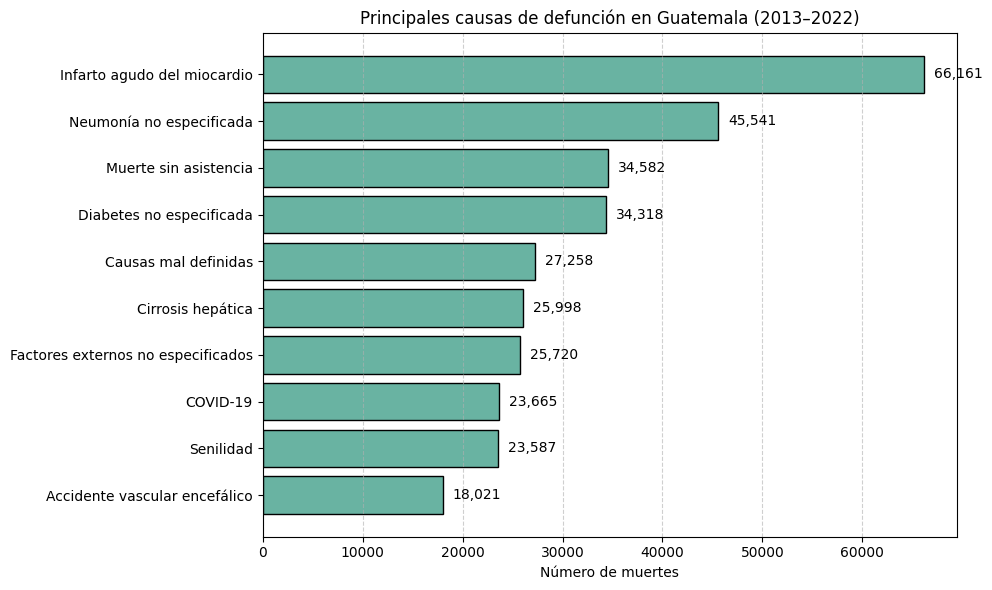

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos_combinados.csv")

# Contar las causas más frecuentes
causas_principales = df["Caudef"].value_counts().head(10)

# Mostrar resultados con etiquetas bonitas
print("Principales causas de muerte :\n")
for codigo, cantidad in causas_principales.items():
    print(f"{codigo}: {cantidad:,} muertes")



# Diccionario de códigos CIE-10 con descripciones
descripcion_causas = {
    "I219": "Infarto agudo del miocardio",
    "J189": "Neumonía no especificada",
    "R98X": "Muerte sin asistencia",
    "E149": "Diabetes no especificada",
    "R99X": "Causas mal definidas",
    "K746": "Cirrosis hepática",
    "X599": "Factores externos no especificados",
    "U071": "COVID-19",
    "R54X": "Senilidad",
    "I64X": "Accidente vascular encefálico"
}

# Datos de cantidad de muertes por causa
datos_causas = {
    "I219": 66161,
    "J189": 45541,
    "R98X": 34582,
    "E149": 34318,
    "R99X": 27258,
    "K746": 25998,
    "X599": 25720,
    "U071": 23665,
    "R54X": 23587,
    "I64X": 18021
}

# Crear DataFrame
df_causas = pd.DataFrame({
    "Código": list(datos_causas.keys()),
    "Descripción": [descripcion_causas[cod] for cod in datos_causas.keys()],
    "Muertes": list(datos_causas.values())
})

# Ordenar
df_causas = df_causas.sort_values(by="Muertes", ascending=True)

# Crear gráfico
plt.figure(figsize=(10, 6))
bars = plt.barh(df_causas["Descripción"], df_causas["Muertes"], edgecolor='black', color='#69b3a2')
plt.xlabel("Número de muertes")
plt.title("Principales causas de defunción en Guatemala (2013–2022)")
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000, bar.get_y() + bar.get_height()/2,
             f"{int(width):,}", va='center')

plt.tight_layout()
plt.show()

## Conclusiones sobre las principales causas de defunción (2013–2022)
1. **Las enfermedades cardiovasculares representan la principal causa de muerte en Guatemala**, con el infarto agudo del miocardio (I219) como líder indiscutible, acumulando 66,161 muertes en el período. Esto pone en evidencia la alta prevalencia de enfermedades crónicas no transmisibles.

2. **Las infecciones respiratorias, como la neumonía no especificada (J189)**, causaron más de 45 mil muertes, lo que sugiere una carga significativa de enfermedades infecciosas, posiblemente asociadas a condiciones de salud pública, clima, acceso a atención médica y enfermedades respiratorias crónicas.

3. **La “muerte sin asistencia” (R98X)** ocupa un lugar alarmante con 34,582 muertes, lo cual indica que una gran cantidad de personas fallecieron sin recibir atención médica. Este dato puede estar relacionado con pobreza, ruralidad, barreras de acceso al sistema de salud o muertes súbitas.

4. **La diabetes mellitus no especificada (E149)** provocó 34,318 muertes, confirmando su impacto como una enfermedad crónica de alta letalidad en la población guatemalteca, especialmente si no se diagnostica ni trata adecuadamente.

5. **Más de 27 mil muertes fueron clasificadas bajo causas mal definidas (R99X)**, lo cual refleja limitaciones en el diagnóstico, registro y certificación de causas de defunción. Esto puede disminuir la calidad de los análisis y debe ser una prioridad para mejorar los sistemas de información en salud.

6. **El impacto del COVID-19 (U071), con 23,665 muertes registradas**, confirma la magnitud de la pandemia, aunque no alcanza a desplazar otras causas más persistentes en el tiempo como el infarto, la neumonía o la diabetes.

7. **Otras condiciones relevantes incluyen**:

- **Cirrosis hepática (K746):** 25,998 muertes, posiblemente asociadas a enfermedades hepáticas crónicas como hepatitis o alcoholismo.

- **Factores externos no especificados (X599):** 25,720 muertes, lo que podría incluir accidentes, violencia o suicidios no bien clasificados.

- **Senilidad (R54X):** 23,587 muertes, reflejando el envejecimiento poblacional sin causa específica registrada.

- **Accidente cerebrovascular (I64X):** 18,021 muertes, lo cual refuerza el peso de las enfermedades cerebrovasculares en la carga de enfermedad del país.

## Tendencia mensual de defunciones

Defunciones por mes:

Mesocu
Enero         73838
Febrero       65212
Marzo         71341
Abril         69747
Mayo          71102
Junio         72536
Julio         80782
Agosto        79550
Septiembre    77296
Octubre       74329
Noviembre     69186
Diciembre     73217
Name: count, dtype: int64


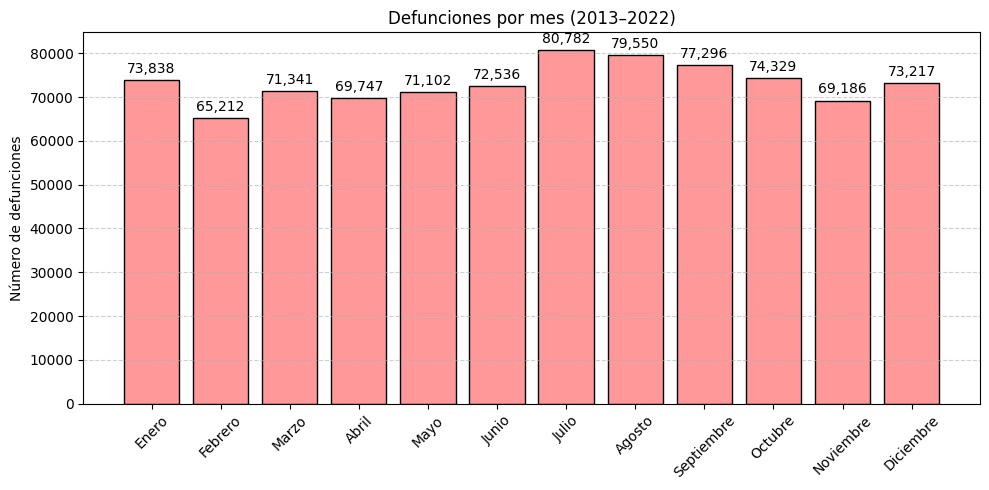

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos_combinados.csv")

# Contar defunciones por mes
defunciones_por_mes = df["Mesocu"].value_counts().sort_index()

# Crear un diccionario para nombres de meses
meses = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

defunciones_por_mes.index = defunciones_por_mes.index.map(meses)

print("Defunciones por mes:\n")
print(defunciones_por_mes)

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(defunciones_por_mes.index, defunciones_por_mes.values, color="#ff9999", edgecolor="black")
plt.ylabel("Número de defunciones")
plt.title("Defunciones por mes (2013–2022)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar valores sobre cada barra
for i, v in enumerate(defunciones_por_mes.values):
    plt.text(i, v + 1000, f"{v:,}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Conclusiones sobre la distribución mensual de defunciones (2013–2022)

1. **Los meses con mayor número de defunciones fueron julio (80,782), agosto (79,550) y septiembre (77,296)**. Esta concentración sugiere un posible patrón estacional como las lluvias de invierno.
2. **Febrero fue el mes con menor cantidad de muertes (65,212), seguido de noviembre (69,186) y abril (69,747)**. Esto podría deberse a factores como condiciones climáticas más estables o menor circulación de enfermedades infecciosas.

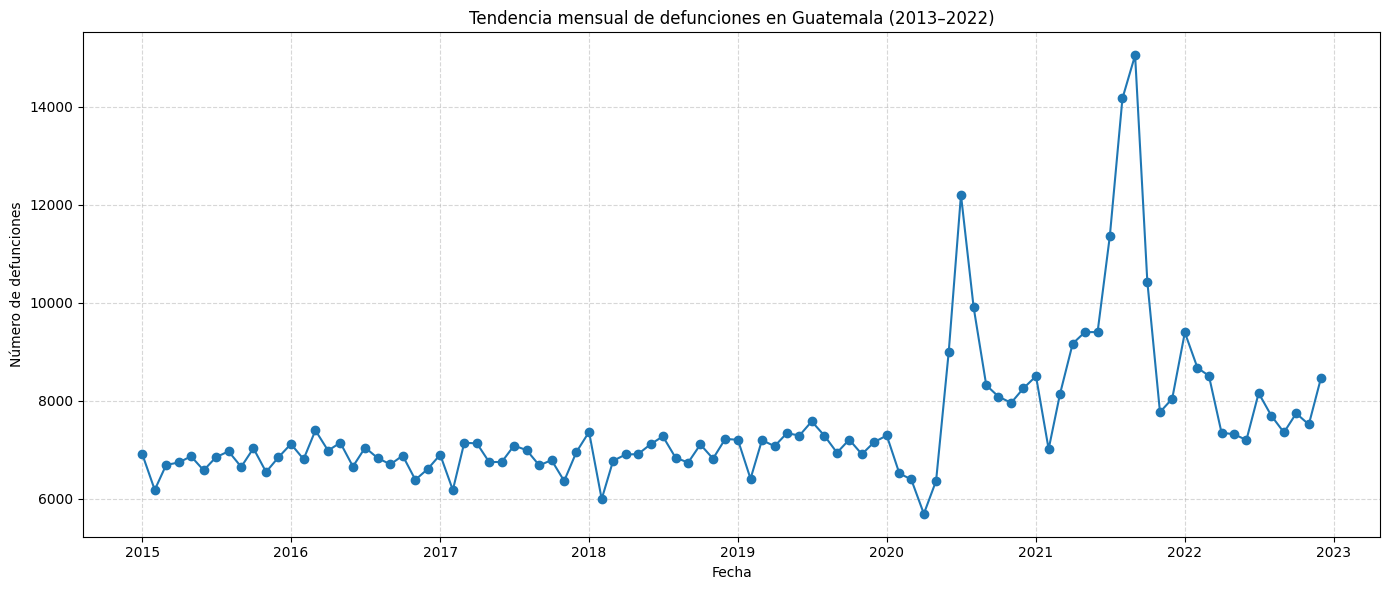

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos_combinados.csv")

df_limpio = df.dropna(subset=["Añoocu", "Mesocu"])

df_limpio["Añoocu"] = df_limpio["Añoocu"].astype(int)
df_limpio["Mesocu"] = df_limpio["Mesocu"].astype(int)

# Agrupar por año y mes
agrupado = df_limpio.groupby(["Añoocu", "Mesocu"]).size().reset_index(name="Defunciones")

# Crear columna de fecha (para el eje X)
agrupado["Fecha"] = pd.to_datetime(dict(year=agrupado["Añoocu"], month=agrupado["Mesocu"], day=1))

# Ordenar cronológicamente
agrupado = agrupado.sort_values("Fecha")

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(agrupado["Fecha"], agrupado["Defunciones"], marker='o')
plt.title("Tendencia mensual de defunciones en Guatemala (2013–2022)")
plt.xlabel("Fecha")
plt.ylabel("Número de defunciones")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Distribución por sexo

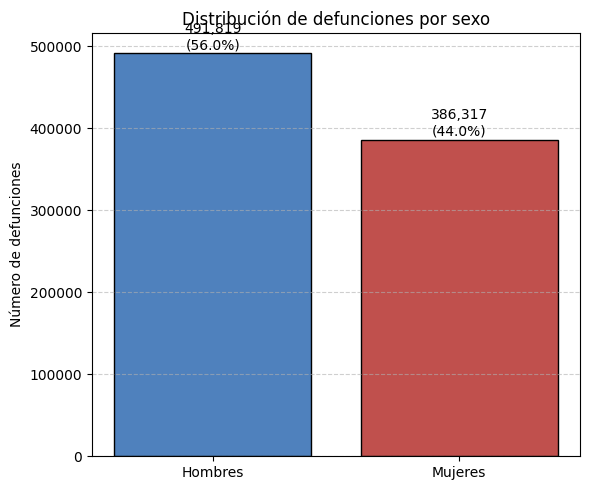

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos_combinados.csv")

# Contar defunciones por sexo
conteo_sexo = df["Sexo"].value_counts()
total = conteo_sexo.sum()
porcentajes = (conteo_sexo / total) * 100

labels = ["Hombres" if sexo == 1 else "Mujeres" if sexo == 2 else "Desconocido" for sexo in conteo_sexo.index]
valores = conteo_sexo.values

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, valores, color=["#4f81bd", "#c0504d"], edgecolor="black")
plt.title("Distribución de defunciones por sexo")
plt.ylabel("Número de defunciones")
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar, sexo in zip(bars, conteo_sexo.index):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1000,
             f"{int(height):,}\n({porcentajes[sexo]:.1f}%)",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Conclusiones sobre la distribución por sexo
1. **Los hombres representaron el 56% del total de defunciones** entre 2013 y 2022, con 491,819 muertes registradas.
Esto indica que la mortalidad masculina ha sido consistentemente más alta, lo cual podría deberse a una combinación de factores.

2. **Las mujeres representaron el 44% del total, con 386,317 muertes**, lo que refleja una menor proporción, posiblemente asociada a una mayor esperanza de vida y diferentes perfiles de riesgo en salud.